In [1]:
import numpy as np
import pandas as pd
import folium

In [2]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df = data[0]

# currently what should be header is first row, so fix this:
df.columns = df.iloc[0]
df = df[1:]

# remove boroughs with value 'Not assigned'
df = df[df['Borough'] != 'Not assigned']

# ensure postal codes are not repeated, and that each neighbourhood is listed for each unique postal code.
df = df.groupby(['Postal Code']).head()

df = df.reset_index()

# For cells with boroughs but non-assigned neighborhoods, make neighborhoods same as borough
df.loc[df['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = df.loc[df['Neighbourhood'] == 'Not assigned', 'Borough']

# There's an column named 'index' left over, get rid of it
df.drop(['index'], axis = 'columns', inplace = True)

# Display head of modified data frame
df.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [3]:
# In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
print(np.shape(df))

(103, 3)


In [4]:
# read in geo data CSV

df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
# join the geo data datframe to the original data frame to finish the assignment

df_joined = df.join(df_geo.set_index('Postal Code'), on='Postal Code', how='left')

df_joined.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [19]:
toronto_coords = [43.6532, -79.3832] # Googled

# make folium map centered at Toronto
map_1 = folium.Map(location=toronto_coords, zoom_start=10)

# make a dot for each borough
for i in range(len(df_joined)):
    lat = df_joined['Latitude'][i]
    lon = df_joined['Longitude'][i]
    folium.CircleMarker([lat, lon], radius=2).add_to(map_1)

map_1

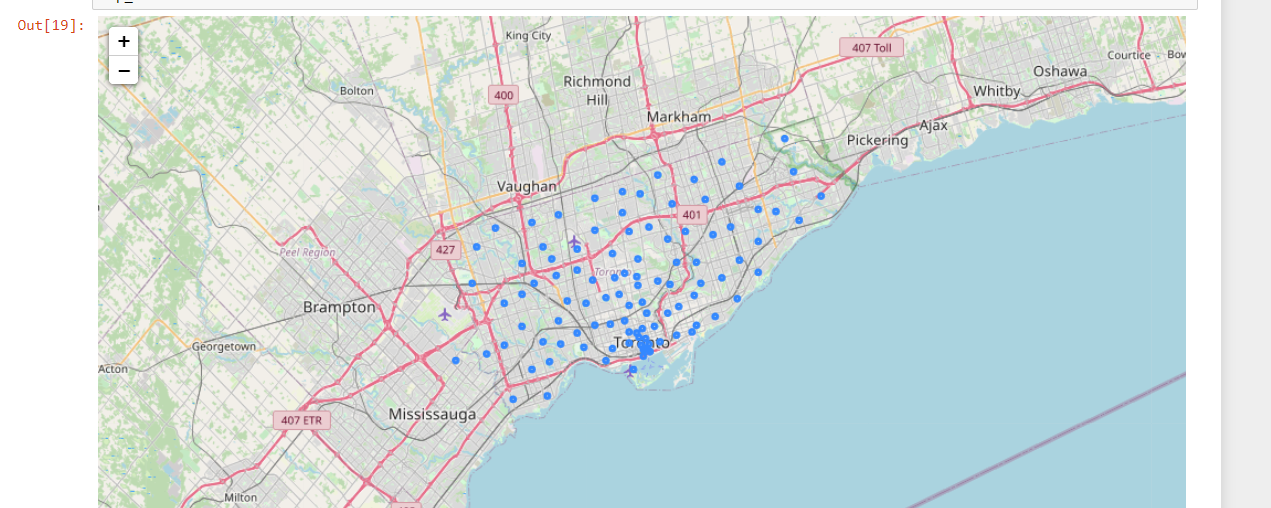

In [1]:
# above map may not show in Github. Below I just took a screenshot of it
from IPython.display import display
from PIL import Image
display(Image.open('wk3_map_image.png'))